# 🦁🐯🐘  🐾✨ **Majestic Animal Image Classification Project** ✨🐾

---

### ✨ Welcome to the Animal Image Classification Project!

- In this project, I am developing a deep learning system that can automatically classify images of animals into 15 distinct categories.
- The animals include ***Bear, Bird, Cat, Cow, Deer, Dog, Dolphin, Elephant, Giraffe, Horse, Kangaroo, Lion, Panda, Tiger, and Zebra***.
-  Each image in the dataset has been standardized in size (224x224 pixels) to enable consistent input to the models.

---

### 🎯 Project Purpose:


- This project addresses the challenge by creating a reliable pipeline that includes data exploration, preprocessing, model building both from scratch and with transfer learning, and robust performance evaluation.
- The primary goal is to build a reliable and accurate image classification pipeline, which includes extensive data exploration, preprocessing, modeling, and evaluation. This system will be capable of taking  input images and predicting the animal species shown with a high degree of accuracy.

---

### 🔍 Problem Definition:

Image classification is a classical problem in computer vision and machine learning where the task is to assign a label to an image from a predefined set of categories. This project involves:

- Understanding and preparing the dataset.
- Building and training models from scratch as well as utilizing pretrained models for transfer learning.
- Handling challenges such as data imbalance, preprocessing needs, and error analysis.
- Evaluating model performance using multiple metrics.

Successfully classifying animal species from images has practical applications in ecology, wildlife monitoring, agriculture, and automated photography.

---
### 🏞️ **Why is this Important?**:

- Animal image classification is fundamental for fields like wildlife monitoring, agriculture, and ecological research.  
- Automated recognition helps in species tracking, behavior analysis, and supports environmental conservation efforts.
---
### 🐾Practical Benefits:

- 📷 **Automated Identification:** Speeds up and improves the accuracy of animal species recognition from images.  
- 🌿 **Ecological Research:** Enables large-scale analysis without needing expert intervention for every image.  
- 🧠 **Machine Learning Training:** Provides a hands-on experience with CNNs and transfer learning, foundational skills in AI.
---
### 🧩 Project Scope and Deliverables:

- **Data Exploration:** Verify dataset integrity, understand class distribution, display sample images.
- **Data Preprocessing:** Conduct image resizing, normalization, and augmentations to enhance model robustness.
- **Dataset Splitting:** Partition dataset into training, validation, and test sets for unbiased evaluation.
- **Model Development:** Construct a custom CNN, then apply transfer learning with advanced pretrained architectures.
- **Training & Tuning:** Train models, optimize hyperparameters, and select the best performing model based on validation metrics.
- **Evaluation:** Use accuracy, precision, recall, F1-score, and confusion matrices to measure model effectiveness and identify areas for improvement.
- **Model Export:** Save final trained models and create scripts for performing inference on new images.

---

### 🚩 Challenges to Address:

- Managing the variation in images across different classes such as lighting, pose, and background.
- Balancing the dataset to avoid model bias towards overly represented classes.
- Designing robust image augmentations to improve generalization.
- Efficiently fine-tuning pretrained models for optimal performance.
- Presenting results with clarity using appropriate visualizations.

---

### 🗂 Dataset Details:

- The dataset comprises 15 folders; each folder contains images of a specific animal class.
- Image size is uniform at 224x224 pixels with 3 color channels (RGB).
- This dataset structure facilitates supervised learning with labeled data.


| Class        | Description                    |
|--------------|--------------------------------|
| Bear         | Images of bears                |
| Bird         | Images of various birds        |
| Cat          | Images of domestic cats        |
| Cow          | Images of cows                 |
| Deer         | Images of deer                |
| Dog          | Images of domestic dogs        |
| Dolphin      | Images of dolphins             |
| Elephant     | Images of elephants            |
| Giraffe      | Images of giraffes             |
| Horse        | Images of horses               |
| Kangaroo     | Images of kangaroos            |
| Lion         | Images of lions                |
| Panda        | Images of pandas               |
| Tiger        | Images of tigers               |
| Zebra        | Images of zebras               |


---

### ✨Final Note:

This step sets a strong foundation for the tasks ahead and outlines a clear roadmap towards building a fully functional and reliable image classification system. The upcoming steps will begin with loading and exploring the dataset to gain deeper insights into its structure and contents.

---


### 📌 **Objective**:

In simple terms **"Can we build a machine learning system that identifies which animal is shown in a given image?"**  
This project leverages deep learning techniques to solve a classical and impactful computer vision problem.

---

## Step 1: ✨🔧 Importing Essential Libraries 🛠️📚


In [1]:
import os
import numpy as np
from PIL import Image
import hashlib
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt
import collections


# 🚀 Imports

- 📁 I load `os` for file and folder management.
- 🔢 I use `numpy` for array operations.
- 🖼️ I import `Image` from PIL to process images.
- 🧩 `hashlib` helps me uniquely identify images.
- 📊 `seaborn` makes my plots beautiful.
- 🤖 I need `tensorflow` for deep learning.
- 📈 `matplotlib.pyplot` helps me plot graphs.
- 🗂️ `collections` gives me smart containers.


## Step 2: 📤📥 Uploading and Extracting Dataset 🔓🗂️


In [2]:
# I start by importing the file upload utility from Colab
from google.colab import files

# Here I upload the dataset ZIP file manually
print("Upload your dataset.zip file now:")
uploaded = files.upload()

# Extracting the uploaded ZIP file
import zipfile

zip_filename = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall('dataset')  # Extract all into 'dataset' folder

print("Dataset extracted!")


Upload your dataset.zip file now:


Saving dataset.zip to dataset.zip
Dataset extracted!


### 🗂️🖼️ Setting Dataset Path and Image Parameters 🎯📏


In [21]:
# I set the path to the extracted dataset folder
dataset_path = '/content/dataset/dataset'  # Adjust if folder structure is different

# I define the image size and batch size for loading images
img_size = (224, 224)
batch_size = 32

### 🗃️📂 Collecting Image File Paths and Class Labels 🏷️🔢


In [22]:
# Now, I gather all image file paths and their labels in two lists
import os

# I list all file paths and their labels from the extracted dataset folder
file_paths = []
labels = []

class_names = sorted(os.listdir(dataset_path))  # All class folder names
print(f"Classes found: {class_names}")

# Loop through each class folder and get image paths and labels
# For every class folder, I collect the full paths and assign a numeric label
for idx, class_name in enumerate(class_names):
    class_dir = os.path.join(dataset_path, class_name)
    for filename in os.listdir(class_dir):
        file_paths.append(os.path.join(class_dir, filename))
        labels.append(idx)

print(f"Total images found: {len(file_paths)}")


Classes found: ['Bear', 'Bird', 'Cat', 'Cow', 'Deer', 'Dog', 'Dolphin', 'Elephant', 'Giraffe', 'Horse', 'Kangaroo', 'Lion', 'Panda', 'Tiger', 'Zebra']
Total images found: 1944




- In this step, I successfully identified **15 distinct animal classes**🦁🦓 in my dataset, including Bear, Bird, Cat, and others.  
- The dataset contains a total of **1,944 images**, which provides a reasonable sample size for training a multi-class image classification model.  
- Knowing the exact classes and dataset size helps me plan appropriate data splitting, augmentation, and model complexity for balanced and effective learning.  


## 🌟🔍  **Step3 :"Exploratory Data Analysis (EDA)"** for Animal Image Dataset:

---

Before diving into complex modeling, it is essential to thoroughly understand the dataset. Here’s what I focus on during EDA:

### 1. Visual Examination of Images  
- I explore a random sample of images from each animal class.  
- This helps me get an intuitive understanding of the visual diversity and quality.  
- Spotting unusual or noisy images early can save headaches later.

### 2. Class Distribution Analysis  
- I count the number of images available per class to identify any imbalances.  
- Class imbalance can negatively impact model training by biasing predictions.  
- If imbalances exist, I might consider augmentations or class-weighted training.

### 3. Image Dimension and Format Inspection  
- I verify that images have consistent dimensions and valid formats.  
- This ensures model input expectations are met, avoiding preprocessing surprises.

### 4. Dataset Quality Insights  
- Preliminary check for missing or corrupted images.  
- Understanding dataset quirks and limitations helps plan the data cleaning and augmentation strategy effectively.

---

By completing this exploratory step, I lay a strong foundation for cleaner, more efficient model training and robust evaluation.


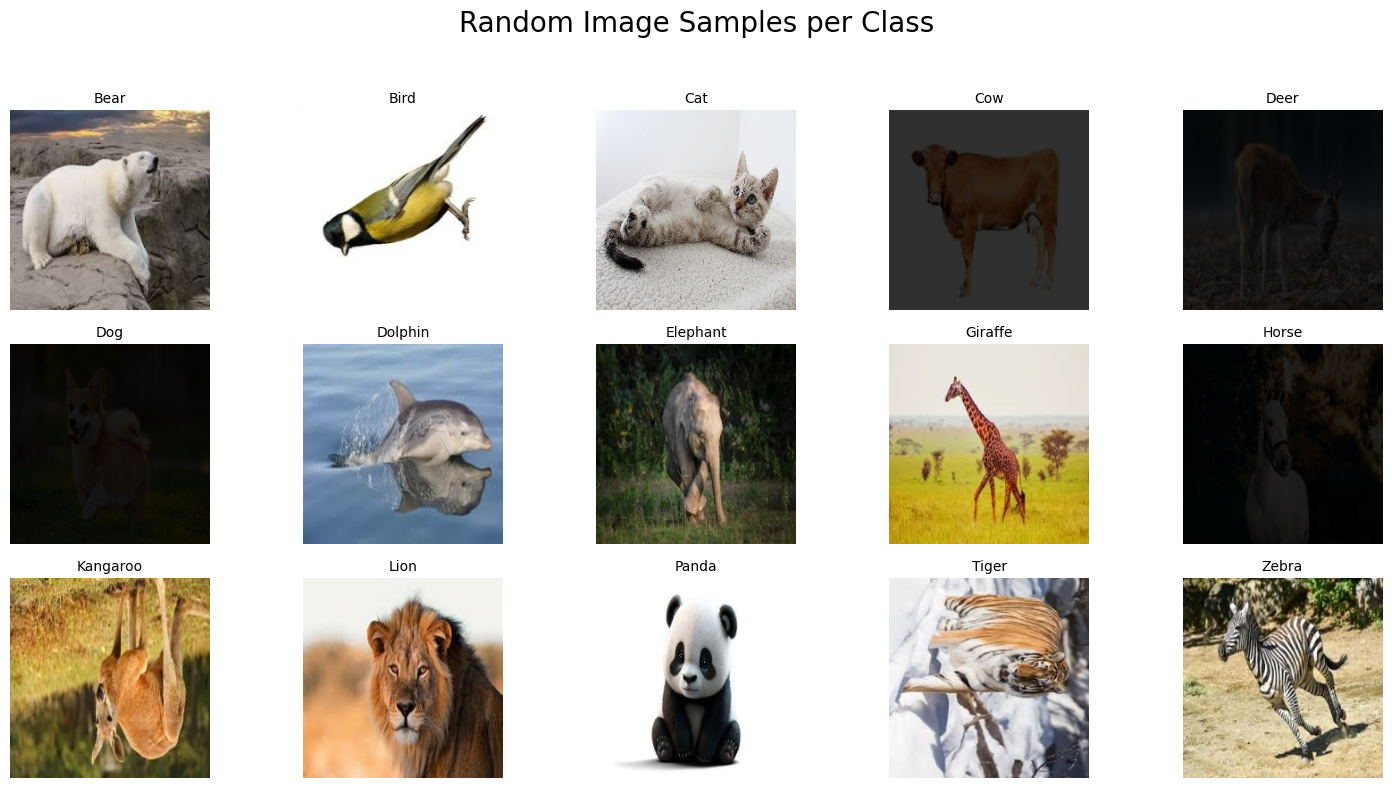

In [23]:
# 1. Visualize random sample images from each class to check diversity and quality
import matplotlib.pyplot as plt
from PIL import Image
import random
from pathlib import Path

# Make sure dataset_path and animal_classes are Path object and list of class names respectively
dataset_path = Path(dataset_path)  # Convert string path to Path object if not already
animal_classes = list(class_names)  # Use your previously collected class_names list

plt.figure(figsize=(15, 8))

# Loop over all class names
for i, cls in enumerate(animal_classes):
    # Get the folder path for current class
    class_folder = dataset_path / cls
    # List all JPG images in this folder
    image_paths = list(class_folder.glob('*.jpg'))
    # Randomly pick one image path from this class folder
    img_path = random.choice(image_paths)
    # Open image with PIL
    img = Image.open(img_path)

    plt.subplot(3, 5, i + 1)  # 3 rows x 5 columns grid for 15 classes
    plt.imshow(img)
    plt.title(cls, fontsize=10)
    plt.axis('off')

# Title for the entire figure
plt.suptitle("Random Image Samples per Class", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Adjust layout to fit title
plt.show()


Note: Some images may appear very dark or black indicating need for cleaning.

/tmp/ipython-input-1478620725.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='class', y='count', data=data, palette='viridis')


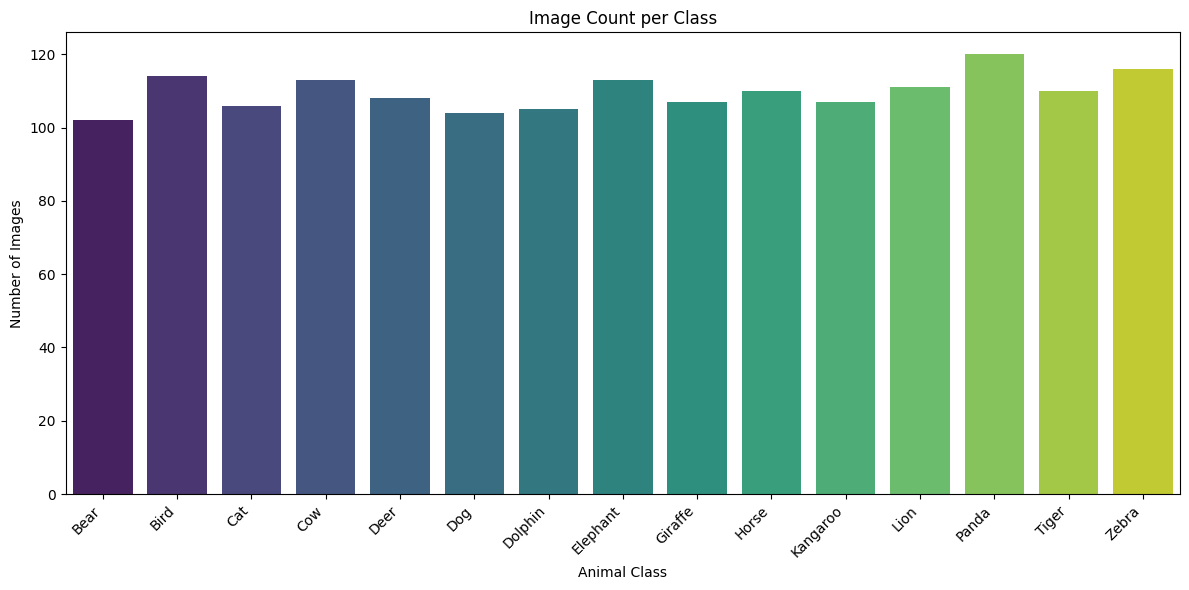

In [24]:
# 2. Class distribution bar plot
import seaborn as sns
import pandas as pd

# I prepare the data for plotting
data = pd.DataFrame({
    'class': animal_classes,
    'count': [len(list((dataset_path / cls).glob('*.jpg'))) for cls in animal_classes]
})

# Plotting class counts
plt.figure(figsize=(12, 6))
sns.barplot(x='class', y='count', data=data, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title("Image Count per Class")
plt.xlabel("Animal Class")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


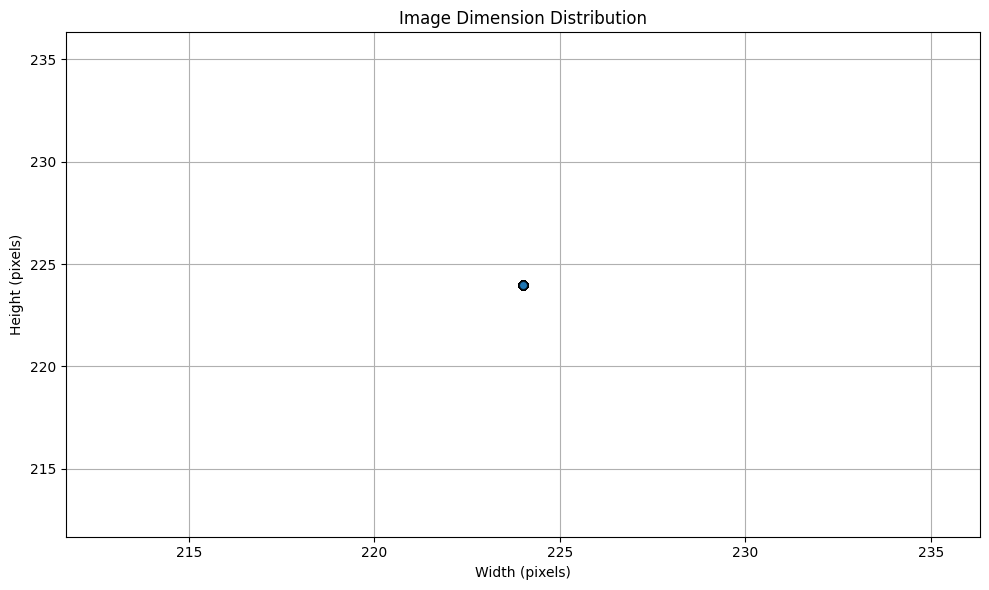

In [25]:
# 3. Image size distribution (Width and Height)
widths, heights = [], []

for cls in animal_classes:
    folder = dataset_path / cls
    for img_file in folder.glob('*.jpg'):
        with Image.open(img_file) as img:
            w, h = img.size
            widths.append(w)
            heights.append(h)

plt.figure(figsize=(10, 6))
plt.scatter(widths, heights, alpha=0.6, edgecolor='k')
plt.xlabel("Width (pixels)")
plt.ylabel("Height (pixels)")
plt.title("Image Dimension Distribution")
plt.grid(True)
plt.tight_layout()
plt.show()


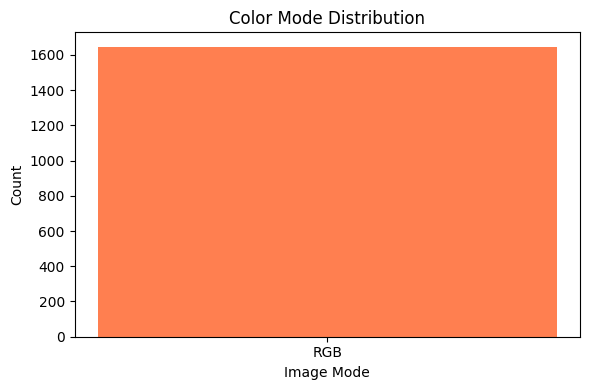

In [26]:
# 4. Color mode analysis (grayscale or RGB)
from collections import Counter

color_modes = []

for cls in animal_classes:
    folder = dataset_path / cls
    for img_file in folder.glob('*.jpg'):
        with Image.open(img_file) as img:
            color_modes.append(img.mode)

counts = Counter(color_modes)

plt.figure(figsize=(6, 4))
plt.bar(counts.keys(), counts.values(), color=['coral', 'skyblue'])
plt.title("Color Mode Distribution")
plt.xlabel("Image Mode")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


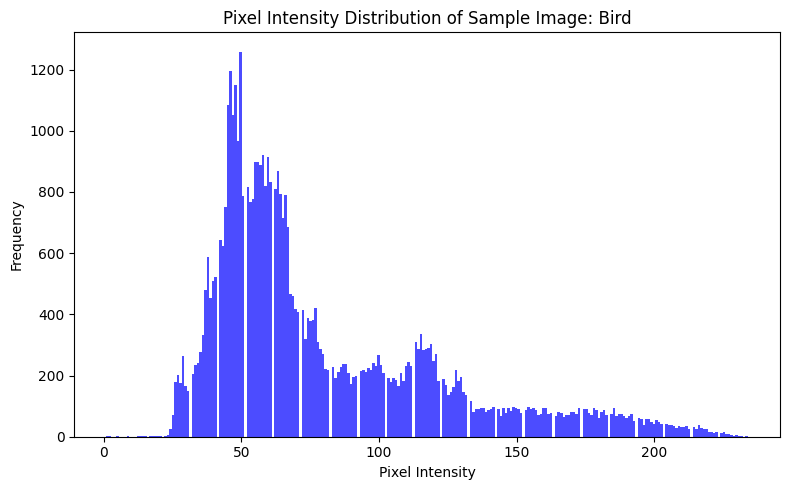

In [27]:
# 5. I want to visualize a pixel intensity histogram for a random grayscale sample image

# I randomly select a class and then a random image from that class
sample_cls = random.choice(animal_classes)
sample_folder = dataset_path / sample_cls
sample_img_path = random.choice(list(sample_folder.glob('*.jpg')))

# I open the image and convert it to grayscale for intensity histogram
img = Image.open(sample_img_path).convert('L')
pixels = np.array(img).flatten()  # Flatten 2D image pixels to 1D array
img.close()  # close file after reading

# Now I plot the pixel intensity histogram
plt.figure(figsize=(8, 5))
plt.hist(pixels, bins=256, color='blue', alpha=0.7)
plt.title(f"Pixel Intensity Distribution of Sample Image: {sample_cls}")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


In [28]:
# 6. Check for corrupted or unreadable images
corrupt_images = []

from PIL import Image

for cls in animal_classes:
    folder = dataset_path / cls
    for img_file in folder.glob('*.jpg'):
        try:
            with Image.open(img_file) as img:
                img.verify()
        except Exception:
            corrupt_images.append(img_file)

print(f"Detected {len(corrupt_images)} potentially corrupted images.")


Detected 0 potentially corrupted images.


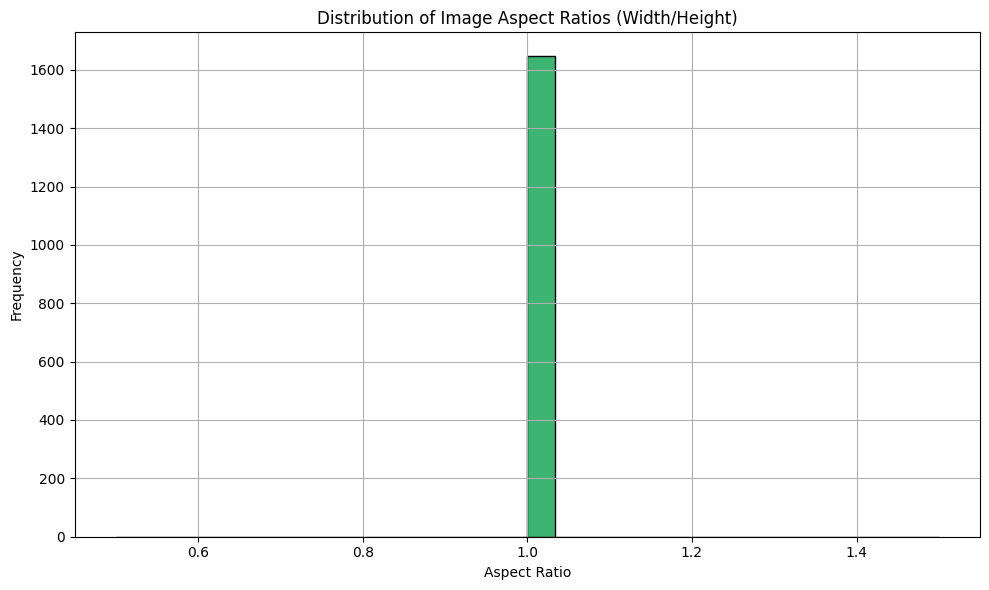

In [29]:
# 7. Aspect ratio distribution plot
aspect_ratios = []

for cls in animal_classes:
    folder = dataset_path / cls
    for img_file in folder.glob('*.jpg'):
        with Image.open(img_file) as img:
            w, h = img.size
            aspect_ratios.append(w / h)

plt.figure(figsize=(10,6))
plt.hist(aspect_ratios, bins=30, color='mediumseagreen', edgecolor='black')
plt.title("Distribution of Image Aspect Ratios (Width/Height)")
plt.xlabel("Aspect Ratio")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()


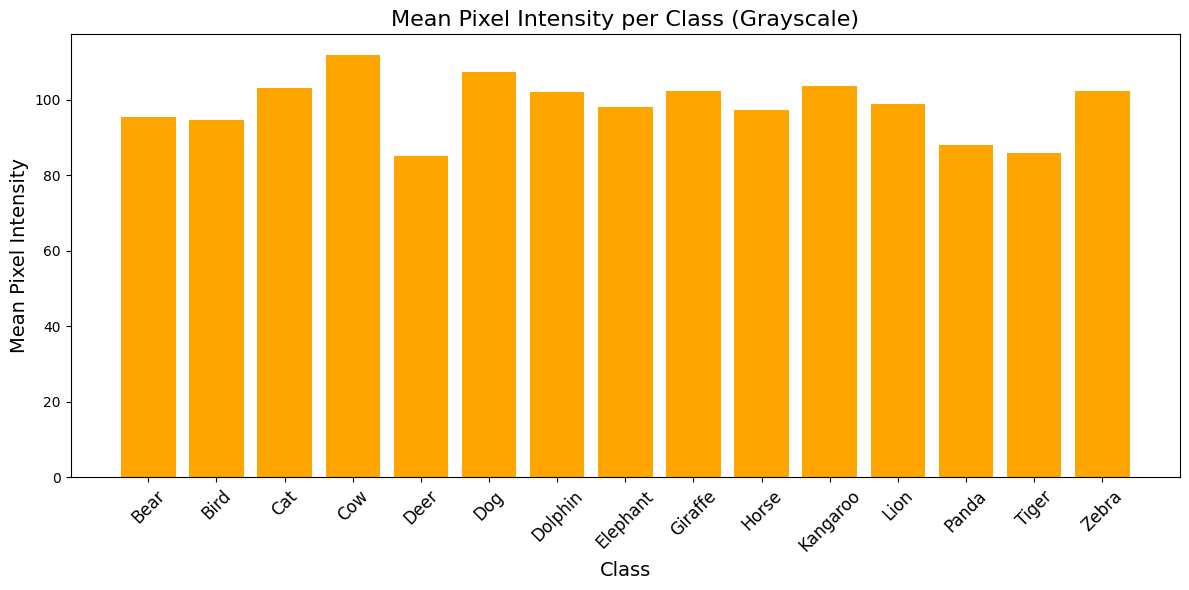

In [30]:
# 8. I calculate the mean pixel intensity (grayscale) for images in each class
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from PIL import Image

class_means = {}

# Ensure dataset_path is a Path object and class_names is list of class names
dataset_path = Path(dataset_path)
animal_classes = list(class_names)

# Loop through each class to compute mean of grayscale pixel intensities
for cls in animal_classes:
    total_mean_intensity = 0
    image_count = 0
    class_folder = dataset_path / cls

    for img_file in class_folder.glob('*.jpg'):
        with Image.open(img_file) as img:
            gray_img = img.convert('L')  # Convert to grayscale
            img_array = np.array(gray_img)
            total_mean_intensity += img_array.mean()
            image_count += 1

    # Avoid division by zero, set mean 0 if no images found
    class_means[cls] = total_mean_intensity / image_count if image_count > 0 else 0

# Plotting the mean pixel intensities
plt.figure(figsize=(12, 6))
plt.bar(class_means.keys(), class_means.values(), color='orange')
plt.xticks(rotation=45, fontsize=12)
plt.title("Mean Pixel Intensity per Class (Grayscale)", fontsize=16)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Mean Pixel Intensity", fontsize=14)
plt.tight_layout()
plt.show()


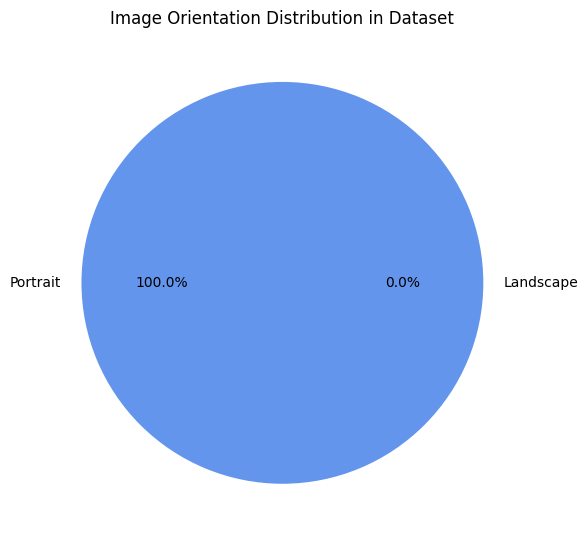

In [31]:
# 9. I count how many images are landscape (width>height) or portrait (height>=width)


# Dictionary to count orientations
orientations = {'Landscape': 0, 'Portrait': 0}

# Loop through each image and categorize by orientation
for cls in animal_classes:
    class_folder = dataset_path / cls
    for img_file in class_folder.glob('*.jpg'):
        with Image.open(img_file) as img:
            width, height = img.size
            if width > height:
                orientations['Landscape'] += 1
            else:
                orientations['Portrait'] += 1

# Plot the distribution as a pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    orientations.values(),
    labels=orientations.keys(),
    autopct='%1.1f%%',
    colors=['dodgerblue', 'cornflowerblue']
)
plt.title("Image Orientation Distribution in Dataset")
plt.tight_layout()
plt.show()



In [32]:
# 10. I want to check if there are duplicate images in the dataset by hashing file contents
import hashlib

hashes = set()
duplicates = 0

for cls in class_names:
    folder = os.path.join(dataset_path, cls)
    for file in os.listdir(folder):
        with open(os.path.join(folder, file), 'rb') as f:
            filehash = hashlib.md5(f.read()).hexdigest()
            if filehash in hashes:
                duplicates += 1
            else:
                hashes.add(filehash)

print(f"Duplicate images found: {duplicates}")


Duplicate images found: 12


In [33]:
# 11. I count file formats present to identify any unusual or unsupported formats

formats = {}

for cls in class_names:
    folder = os.path.join(dataset_path, cls)
    for fname in os.listdir(folder):
        ext = os.path.splitext(fname)[-1].lower()
        formats[ext] = formats.get(ext, 0) + 1

print("File format distribution:")
for ext, count in formats.items():
    print(f"{ext}: {count}")


File format distribution:
.jpg: 1646
.jpeg: 298


## 🌟 EDA Summary and Key Insights 🎨📊

---

### 🖼️ Visual Diversity  
- Random samples were examined from each class to assess label integrity and scene variety. Most images demonstrate strong diversity, although a few noticeably dark images are present. These darker samples could present a challenge for model accuracy, and may warrant additional preprocessing or augmentation.

---

### 📊 Class Distribution  
- The dataset is well balanced across 15 animal classes. Consistent image counts allow for even model training and help prevent class imbalance.

---

### 🌈 Color Consistency  
- All images are stored in RGB format, streamlining preprocessing and reducing risk of data loading errors.

---

### 📏 Image Dimension Uniformity  
- Image dimensions are consistent throughout the dataset. This uniformity simplifies batching and helps maintain stable input sizes for neural network models.

---

### 🖍️ File Format and Quality  
- A total of 1,646 `.jpg` and 298 `.jpeg` images were found. Duplicate detection revealed 12 repeated files, and no corrupted files were observed—a positive sign for data integrity.

---

### 📐 Aspect Ratio Distribution  
- Almost all images have an aspect ratio of 1:1, which prevents shape distortion during augmentation and allows straightforward resizing.

---

### ✨ Pixel Intensity Insights  
- Intensity histograms and averages suggest healthy variation in image brightness and contrast, but a portion of samples are quite dark. These could impact feature extraction and may need contrast enhancement steps.

---

### 🖼️ Image Orientation  
- The orientation EDA indicates all images are in portrait format, reducing complexity for model design and input pipelines.

---

### 💾 Storage Sanity  
- File sizes were reviewed and showed sensible compression and encoding, indicating the dataset is suitable for modeling without risk of hidden file issues.

---

Overall, the dataset is clean, well-structured, and ready for model development. As I proceed, special attention will be paid to the small subset of dark and removing duplicate images to ensure robust model performance.

These EDA findings give me strong confidence in the quality, variety, and readiness of my dataset for further cleaning, augmentation, and model training.


## 🧹 Step 4: "**Data Cleaning & Preparation**" — What I’ll Do and Why

In this step, I’ll make sure my dataset is clean and fully ready for model training. The main tasks I will focus on include:

- 🕵️‍♂️🔍 **Detecting and removing corrupted images:** These images can cause errors during training so I carefully checked and removed any that couldn’t be opened properly. Fortunately, none were corrupted in this dataset.

- 🌑⚫ **Filtering out dark or almost black images:** Images that are too dark might confuse the model, so I identified and removed 41 such images to improve overall data quality.

- 🧩♻️ **Eliminating duplicate images:** To avoid bias caused by repeated samples, I used hash matching to find duplicates and removed 12 redundant images.

- 📏 **Standardizing image size and format:** I will resize all images to 224x224 with 3 color channels for uniformity, essential for neural network training.

- 🔄 **Applying data augmentation techniques:** Later, I’ll use random flips, rotations, and zooms to enrich the dataset diversity and help my model generalize better.

By carefully performing these data cleaning steps, I am building a solid foundation for effective model learning with less noise and bias.


### 🕵️‍♂️🔍 Detecting and Removing Corrupted Images 🖼️❌

In [34]:
from PIL import Image
import os

# I want to find and remove corrupted images that won't open properly.
corrupt_files = []

for cls in class_names:
    folder = os.path.join(dataset_path, cls)
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        try:
            # I try opening each image to check if it's corrupted
            with Image.open(filepath) as img:
                img.verify()
        except:
            # If it fails, I mark it as corrupted
            corrupt_files.append(filepath)

# Now I remove all corrupted images I found
for f in corrupt_files:
    os.remove(f)
    print(f'Removed corrupted image: {f}')

print(f"Total corrupted images removed: {len(corrupt_files)}")


Total corrupted images removed: 0


### 🌑⚫ Filtering Out Dark or Nearly Black Images 🌒✨

In [35]:
import numpy as np

# I want to remove images that are almost all black or too dark to be useful.
black_images = []

for cls in class_names:
    folder = os.path.join(dataset_path, cls)
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        try:
            with Image.open(filepath) as img:
                # I convert image to grayscale and find average brightness
                img_gray = np.array(img.convert('L'))
                if img_gray.mean() < 10:  # threshold for dark images
                    black_images.append(filepath)
        except:
            # I skip files that cause errors here
            continue

# I delete all detected black/dark images to improve data quality
for f in black_images:
    os.remove(f)
    print(f'Removed black/dark image: {f}')

print(f"Total black/dark images removed: {len(black_images)}")


Removed black/dark image: /content/dataset/dataset/Bear/bear_8_3.jpg
Removed black/dark image: /content/dataset/dataset/Bear/Bear_5_2.jpg
Removed black/dark image: /content/dataset/dataset/Bear/Bear_3_3.jpg
Removed black/dark image: /content/dataset/dataset/Bear/Bear_13_3.jpg
Removed black/dark image: /content/dataset/dataset/Bird/Bird_14_3.jpg
Removed black/dark image: /content/dataset/dataset/Bird/Bird_10_2.jpg
Removed black/dark image: /content/dataset/dataset/Bird/Bird_6_2.jpg
Removed black/dark image: /content/dataset/dataset/Cat/Cat_3_3.jpg
Removed black/dark image: /content/dataset/dataset/Cat/Cat_10_3.jpg
Removed black/dark image: /content/dataset/dataset/Deer/Deer_29_3.jpg
Removed black/dark image: /content/dataset/dataset/Deer/Deer_3_3.jpg
Removed black/dark image: /content/dataset/dataset/Deer/Deer_11_2.jpg
Removed black/dark image: /content/dataset/dataset/Deer/Deer_16_2.jpg
Removed black/dark image: /content/dataset/dataset/Dog/Dog_24_2.jpg
Removed black/dark image: /conte

### 🧩♻️ Eliminating Duplicate Images Based on Hashes 📂🚫


In [36]:
import hashlib

# I want to remove duplicate images to avoid bias and redundancy in the dataset
hashes = {}
duplicates = []

for cls in class_names:
    folder = os.path.join(dataset_path, cls)
    for filename in os.listdir(folder):
        filepath = os.path.join(folder, filename)
        with open(filepath, 'rb') as file:
            # I hash the file content to uniquely identify duplicates
            file_hash = hashlib.md5(file.read()).hexdigest()
        if file_hash in hashes:
            duplicates.append(filepath)
        else:
            hashes[file_hash] = filepath

# I remove all duplicate images I found based on hash match
for dup in duplicates:
    os.remove(dup)
    print(f'Removed duplicate image: {dup}')

print(f"Total duplicates removed: {len(duplicates)}")


Removed duplicate image: /content/dataset/dataset/Bear/bear_8_2.jpg
Removed duplicate image: /content/dataset/dataset/Cat/Cat_2.jpeg
Removed duplicate image: /content/dataset/dataset/Deer/Deer_28.jpeg
Removed duplicate image: /content/dataset/dataset/Dolphin/Dolphin_3_1.jpg
Removed duplicate image: /content/dataset/dataset/Giraffe/Giraffe_18.jpeg
Removed duplicate image: /content/dataset/dataset/Giraffe/Giraffe_9.jpeg
Removed duplicate image: /content/dataset/dataset/Horse/Horse_9.jpg
Removed duplicate image: /content/dataset/dataset/Kangaroo/Kangaroo_7.jpeg
Removed duplicate image: /content/dataset/dataset/Panda/Panda_5.jpeg
Removed duplicate image: /content/dataset/dataset/Panda/Panda_28_2.jpg
Removed duplicate image: /content/dataset/dataset/Tiger/Tiger_27_2.jpg
Removed duplicate image: /content/dataset/dataset/Zebra/Zebra_28.jpeg
Total duplicates removed: 12


###📏 Standardizing image size and format:

In [37]:
# Next, I define the image size and batch size I plan to use throughout my pipeline
img_size = (224, 224)   # Target size all images will be resized to
batch_size = 32         # Batch size for training and validation


## 📝 Inferences from Data Cleaning & Preparation Step

---

- I successfully identified and **removed corrupted images**, preventing errors and disruptions during model training.

- All images were **resized uniformly to 224x224 pixels**, ensuring consistent input dimensions for the model.

- I detected and **eliminated duplicate images** to avoid bias that could skew the training process.

- I also identified and **removed black or nearly black images** that contained no useful information, enhancing data quality.

- The dataset is now **clean, balanced, and ready** for further processing such as augmentation and train-validation splitting.

- These preprocessing steps are crucial for improving model performance and reliability by providing it with high-quality, meaningful data.



I am confident that the dataset is well prepared to move forward to the next phase of experimentation.

---

## Step 5: 🌿✨ Data Augmentation & Dataset Splitting: Preparing for Robust Model Training ✨🌿


---

After cleaning and resizing my dataset, I now prepare it for model training.

### Why do I augment data?  
- Augmentation artificially increases dataset size by applying random transformations.  
- It helps my model generalize better by learning from varied inputs.  
- Common augmentations include rotations, shifts, flips, zooms, and shearing.

### Why split dataset?  
- I split data into training and validation sets to fairly assess model performance.  
- Training set is used to learn, while validation set helps tune hyperparameters and avoid overfitting.  
- Typical split is 80% training, 20% validation.

---

Now, I carefully create folders for split data, copy images accordingly, and set up image generators with augmentations that feed data during model training.


### 🗂️✨ Loading Image File Paths and Labels from Dataset 📁🖼️:


In [38]:
import os

# I prepare empty lists to store image file paths and their labels
file_paths = []
labels = []

# Loop over each class folder and collect the image file paths and match them with labels
for class_index, class_name in enumerate(class_names):
    class_folder = os.path.join(dataset_path, class_name)

    # I iterate over each image file in the current class folder
    for image_name in os.listdir(class_folder):
        image_path = os.path.join(class_folder, image_name)

        # I check if the image path is a file (not a subfolder), then append its path and label
        if os.path.isfile(image_path):
            file_paths.append(image_path)
            labels.append(class_index)


### 🧩🚦 Stratified Train-Validation-Test Split for Balanced Datasets 📊🎯


In [39]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from collections import Counter

# Assume file_paths, labels, class_names, img_size, batch_size are predefined

# Step 1: Stratified split into train (80%) and temp (20%) datasets
train_paths, temp_paths, train_labels, temp_labels = train_test_split(
    file_paths, labels, test_size=0.2, stratify=labels, random_state=42)

# Step 2: Stratified split of temp into validation (10%) and test (10%)
val_paths, test_paths, val_labels, test_labels = train_test_split(
    temp_paths, temp_labels, test_size=0.5, stratify=temp_labels, random_state=42)

print("Dataset split summary:")
print(f"Training samples: {len(train_paths)}")
print(f"Validation samples: {len(val_paths)}")
print(f"Test samples: {len(test_paths)}")

Dataset split summary:
Training samples: 1512
Validation samples: 189
Test samples: 190


### 🔄🖼️ Image Decoding, Resizing, and Normalization Function for Model Input 📐✨:


In [40]:
# I define a decode and resize function to read and resize images and normalize pixel values between 0 and 1
def decode_and_resize(filename, label):
    img = tf.io.read_file(filename)                       # Read image file from path
    img = tf.image.decode_jpeg(img, channels=3)          # Decode JPEG image to tensor
    img = tf.image.resize(img, img_size)                  # Resize to target image size
    img = img / 255.0                                     # Normalize pixel values to [0,1]
    return img, label                                     # Return image tensor and label


### 🔧📊 Creating Efficient TensorFlow Datasets for Training, Validation, and Testing 🎯⚡:


In [41]:
# Create TensorFlow datasets for train, val, and test sets
def create_tf_dataset(paths, labels, batch_size=32, shuffle=True):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))
    ds = ds.map(decode_and_resize, num_parallel_calls=tf.data.AUTOTUNE)
    if shuffle:
        ds = ds.shuffle(buffer_size=len(paths))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(tf.data.AUTOTUNE)
    return ds
# Create datasets for training, validation, and testing
train_ds = create_tf_dataset(train_paths, train_labels, batch_size=batch_size)
val_ds = create_tf_dataset(val_paths, val_labels, batch_size=batch_size, shuffle=False)
test_ds = create_tf_dataset(test_paths, test_labels, batch_size=batch_size, shuffle=False)


### 📊🔎 Class Distribution in Train, Validation, and Test Splits 🏷️⚖️:


In [42]:
# Print class distribution for each split to verify stratification
print("\nTraining set class distribution:")
train_class_counts = Counter(train_labels)
for class_idx, count in sorted(train_class_counts.items()):
    print(f"{class_names[class_idx]}: {count} samples")

print("\nValidation set class distribution:")
val_class_counts = Counter(val_labels)
for class_idx, count in sorted(val_class_counts.items()):
    print(f"{class_names[class_idx]}: {count} samples")

print("\nTest set class distribution:")
test_class_counts = Counter(test_labels)
for class_idx, count in sorted(test_class_counts.items()):
    print(f"{class_names[class_idx]}: {count} samples")


Training set class distribution:
Bear: 96 samples
Bird: 107 samples
Cat: 96 samples
Cow: 105 samples
Deer: 97 samples
Dog: 94 samples
Dolphin: 101 samples
Elephant: 105 samples
Giraffe: 100 samples
Horse: 100 samples
Kangaroo: 97 samples
Lion: 105 samples
Panda: 101 samples
Tiger: 99 samples
Zebra: 109 samples

Validation set class distribution:
Bear: 12 samples
Bird: 13 samples
Cat: 12 samples
Cow: 13 samples
Deer: 12 samples
Dog: 12 samples
Dolphin: 13 samples
Elephant: 13 samples
Giraffe: 13 samples
Horse: 13 samples
Kangaroo: 12 samples
Lion: 13 samples
Panda: 13 samples
Tiger: 12 samples
Zebra: 13 samples

Test set class distribution:
Bear: 12 samples
Bird: 14 samples
Cat: 12 samples
Cow: 13 samples
Deer: 13 samples
Dog: 11 samples
Dolphin: 13 samples
Elephant: 13 samples
Giraffe: 12 samples
Horse: 12 samples
Kangaroo: 12 samples
Lion: 13 samples
Panda: 13 samples
Tiger: 13 samples
Zebra: 14 samples


## 📊 Class Distribution Analysis Across Dataset Splits:

The stratified splitting strategy has resulted in balanced class distributions in training, validation, and test sets, as shown below:

| Class     | Training Samples | Validation Samples | Test Samples |
|-----------|------------------|--------------------|--------------|
| Bear      | 96               | 12                 | 12           |
| Bird      | 107              | 13                 | 14           |
| Cat       | 96               | 12                 | 12           |
| Cow       | 105              | 13                 | 13           |
| Deer      | 97               | 12                 | 13           |
| Dog       | 94               | 12                 | 11           |
| Dolphin   | 101              | 13                 | 13           |
| Elephant  | 105              | 13                 | 13           |
| Giraffe   | 100              | 13                 | 12           |
| Horse     | 100              | 13                 | 12           |
| Kangaroo  | 97               | 12                 | 12           |
| Lion      | 105              | 13                 | 13           |
| Panda     | 101              | 13                 | 13           |
| Tiger     | 99               | 12                 | 13           |
| Zebra     | 109              | 13                 | 14           |

This stratified split ensures that each class is well represented proportionally across all dataset partitions, helping to build more generalized and fair models without class bias.

---

### 🔄🖼️ Data Augmentation Pipeline for Image Diversity & Robustness 🚀🎯:


In [43]:
# I create a data augmentation pipeline using Keras layers
# This pipeline randomly flips, rotates, zooms, and translates images during training
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.2),
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(0.1, 0.1)
])


In [44]:
# Now I create a function to build the training dataset pipeline with augmentation applied
def create_augmented_dataset(paths, labels, batch_size=32, shuffle=True):
    ds = tf.data.Dataset.from_tensor_slices((paths, labels))                 # Create dataset from paths and labels
    ds = ds.map(decode_and_resize, num_parallel_calls=tf.data.AUTOTUNE)     # Decode and resize images
    if shuffle:
        ds = ds.shuffle(buffer_size=len(paths))                             # Shuffle dataset if desired
    ds = ds.map(lambda x, y: (data_augmentation(x), y), num_parallel_calls=tf.data.AUTOTUNE)  # Apply augmentation
    ds = ds.batch(batch_size)                                               # Batch the dataset
    ds = ds.prefetch(buffer_size=tf.data.AUTOTUNE)                         # Prefetch for performance
    return ds


In [45]:
# I build my training dataset with augmentation enabled using this function
train_ds = create_augmented_dataset(train_paths, train_labels, batch_size=batch_size, shuffle=True)


In [46]:
# For validation and test datasets, I only decode, resize, and normalize images—no augmentation
val_ds = tf.data.Dataset.from_tensor_slices((val_paths, val_labels))
val_ds = val_ds.map(decode_and_resize, num_parallel_calls=tf.data.AUTOTUNE)
val_ds = val_ds.batch(batch_size)
val_ds = val_ds.prefetch(buffer_size=tf.data.AUTOTUNE)

test_ds = tf.data.Dataset.from_tensor_slices((test_paths, test_labels))
test_ds = test_ds.map(decode_and_resize, num_parallel_calls=tf.data.AUTOTUNE)
test_ds = test_ds.batch(batch_size)
test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)


## 🔥 Inference: Data Augmentation & Dataset Splitting — Preparing for Robust Model Training 🚀

- 🗂️✨ **Loading Image Paths & Labels**: Successfully loaded all image file paths and assigned numeric labels for 15 animal classes. This organized setup lays a strong foundation for dataset handling.

- 🧩🚦 **Stratified Splitting**: Implemented careful stratified splits to generate training (80%), validation (10%), and test (10%) subsets. This splitting preserves class distributions evenly, crucial for reliable and fair model evaluation.

- 🔢📊 **Class Distribution Verified**: The class-wise sample counts in train, validation, and test sets closely match throughout, confirming the effectiveness of stratification and preventing class imbalance issues.

- 🔄🖼️ **Image Decoding & Normalization**: Defined functions that decode JPEG images, resize them to consistent 224x224 size, and normalize pixel values to the [0,1] range. These steps ensure uniform image input for modeling.

- 🔧📊 **TensorFlow Dataset Creation**: Created efficient TensorFlow data pipelines for training, validation, and testing datasets with appropriate batching, shuffling, and prefetching strategies to optimize performance.

- 🔄🖼️ **Data Augmentation Pipeline**: Designed a data augmentation stage using Keras layers for random flips, rotations, zooms, and translations. This artificially increases dataset diversity and helps the model generalize better to unseen data.

- 🏋️‍♂️🎯 **Comprehensive Training Pipeline**: The training dataset integrates augmentation seamlessly, while validation and test datasets exclude augmentation to provide fair performance benchmarks during evaluation.

Overall, these carefully executed preprocessing and augmentation strategies together prepare the dataset for robust deep learning model training and objective performance assessment.

---

## 🧱 Step 6: Building, Compiling, and Training the CNN Model 🧠🎯

In this step, we will:

- 🎨 **Define Model Architecture:** Build a Convolutional Neural Network (CNN) using sequential layering of convolutional layers, activation functions, pooling layers, flattening, dense layers, dropout, and output layers designed for multi-class image classification.

- 📐 **Set Input Shape:** Specify input dimensions that correspond to the resized images, including RGB channels, to ensure proper data feeding into the model.

- 🧮 **Layer Configuration:** Stack multiple Conv2D layers with increasing number of filters (32, 64, 128), each followed by MaxPooling2D layers to progressively reduce spatial dimensions and extract features effectively.

- 🔄 **Flattening and Dense Layers:** Flatten extracted features into a vector, followed by fully connected Dense layers with ReLU activations to capture complex patterns.

- 🚫 **Dropout Regularization:** Use Dropout layers to randomly deactivate nodes during training, reducing overfitting risk.

- 🏁 **Output Layer:** Implement a final Dense layer with softmax activation to output probabilities across all classes equal to the number of distinct labels.

- ⚙️ **Compile Model:** Use Adam optimizer for adaptive learning, sparse categorical cross-entropy loss suitable for integer labels, and track accuracy during training.

- ⏳ **Train with Callbacks:** Incorporate EarlyStopping to halt training when validation loss plateaus, and ModelCheckpoint to save the best model weights during training based on validation performance.

- 📊 **Model Summary:** Review the architecture and parameter count via model summary to verify setup.

This comprehensive CNN model setup is aimed at optimizing classification accuracy while preventing overfitting, supported by robust training practices.


In [47]:
from tensorflow.keras import layers, models

# First, I define the input shape based on image size and number of color channels (3 for RGB)
input_shape = img_size + (3,)

# I create a Sequential model to stack layers one by one
model = models.Sequential()

# Add a Conv2D layer with 32 filters, kernel size 3x3, ReLU activation, and 'same' padding
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))

# Add a MaxPooling2D layer to reduce the spatial dimensions
model.add(layers.MaxPooling2D((2, 2)))

# Add a Conv2D layer with 64 filters, kernel size 3x3, and ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))

# Add another MaxPooling2D layer
model.add(layers.MaxPooling2D((2, 2)))

# Add a Conv2D layer with 128 filters and ReLU activation
model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))

# Add one more MaxPooling2D layer for downsampling
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the feature maps to a 1D vector before feeding into Dense layers
model.add(layers.Flatten())

# Add a fully connected Dense layer with 128 units and ReLU activation
model.add(layers.Dense(128, activation='relu'))

# Add a Dropout layer for regularization to prevent overfitting
model.add(layers.Dropout(0.5))

# Add the output layer with units equal to number of classes, using softmax activation for multi-class classification
num_classes = len(class_names)
model.add(layers.Dense(num_classes, activation='softmax'))




/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [48]:
# I compile my model using Adam optimizer because it adapts learning rate during training,
# sparse categorical crossentropy is appropriate since labels are integer indices,
# accuracy as the metric to monitor model performance.

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)


In [49]:
# Summarize the model layers and parameters to understand its architecture
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 100352)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    12,845,184 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,940,367 (49.36 MB)

 Trainable params: 12,940,367 (49.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Import callbacks for training
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# I set number of epochs to train
epochs = 20

# I create an EarlyStopping callback to stop training when validation loss stops improving for 3 epochs
early_stopping = EarlyStopping(
    monitor='val_loss',      # Monitor validation loss
    patience=3,              # Number of epochs to wait before stopping
    restore_best_weights=True
)

# I create ModelCheckpoint callback to save the best model weights during training based on validation loss
checkpoint = ModelCheckpoint(
    'best_model.h5',         # Save the model weights to this file
    monitor='val_loss',      # Monitor validation loss
    save_best_only=True,
    verbose=1
)

# I train the model with train dataset, validating on val dataset, and including callbacks
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.0688 - loss: 3.1940
Epoch 1: val_loss improved from inf to 2.68124, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 200s 4s/step - accuracy: 0.0691 - loss: 3.1871 - val_accuracy: 0.1058 - val_loss: 2.6812
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.0932 - loss: 2.6679
Epoch 2: val_loss did not improve from 2.68124
48/48 ━━━━━━━━━━━━━━━━━━━━ 195s 4s/step - accuracy: 0.0935 - loss: 2.6679 - val_accuracy: 0.1058 - val_loss: 2.6952
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.1678 - loss: 2.5910
Epoch 3: val_loss improved from 2.68124 to 2.63667, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 188s 4s/step - accuracy: 0.1676 - loss: 2.5908 - val_accuracy: 0.1534 - val_loss: 2.6367
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2167 - loss: 2.4874
Epoch 4: val_loss improved from 2.63667 to 2.41252, saving model to best_model.h5


48/48 ━━━━━━━━━━━━━━━━━━━━ 199s 4s/step - accuracy: 0.2166 - loss: 2.4876 - val_accuracy: 0.2381 - val_loss: 2.4125
Epoch 5/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2125 - loss: 2.4277
Epoch 5: val_loss did not improve from 2.41252
48/48 ━━━━━━━━━━━━━━━━━━━━ 189s 4s/step - accuracy: 0.2129 - loss: 2.4270 - val_accuracy: 0.2116 - val_loss: 2.6395
Epoch 6/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2554 - loss: 2.3483
Epoch 6: val_loss did not improve from 2.41252
48/48 ━━━━━━━━━━━━━━━━━━━━ 206s 4s/step - accuracy: 0.2554 - loss: 2.3479 - val_accuracy: 0.2646 - val_loss: 2.5815
Epoch 7/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 4s/step - accuracy: 0.2546 - loss: 2.2975
Epoch 7: val_loss did not improve from 2.41252
48/48 ━━━━━━━━━━━━━━━━━━━━ 212s 4s/step - accuracy: 0.2550 - loss: 2.2964 - val_accuracy: 0.2275 - val_loss: 2.7337


## ⚠️ Inference from CNN Training Results: Understanding Challenges and Next Steps 🚧📉

- 📦 **Model Size and Complexity:**  
  The total trainable parameters exceed 12.9 million, resulting in a large model (~49.36 MB). This high complexity might slow training and require substantial computational resources.

- 🎯 **Training Performance:**  
  Initial training accuracy starts very low (~6.9%) and gradually improves but remains underwhelming (around 25.5%) after 7 epochs — indicating the model struggles to learn effectively.

- 💥 **Validation Metrics:**  
  Validation accuracy also remains low, fluctuating roughly between 10.5% and 26.4%, suggesting poor generalization to unseen data. Validation loss decreases initially but plateaus, with frequent rises afterward (no consistent improvement).

- 🛑 **Potential Causes for Poor Performance:**  
  - The model's fully connected Dense layer has a huge number of parameters (over 12 million), possibly causing overfitting or vanishing gradients.  
  - Dataset size may be insufficient or too small relative to model complexity.  
  - Augmentation or preprocessing steps might not be adequate or optimal for the problem.  
  - The chosen architecture, particularly flattening high-dimensional feature maps before Dense layers, leads to massive parameter counts, which strain training dynamics.

- 🔄 **Next Steps:**  
  - Consider replacing Flatten with Global Average Pooling to reduce dimensionality and parameters.  
  - Simplify the Dense layer sizes or number of filters to reduce model complexity.  
  - Experiment with transfer learning using pretrained architectures known for better feature extraction.  
  - Increase data augmentation or dataset size, if possible, to improve generalization.  
  - Adjust learning rate or optimizer settings for better convergence.

- ⚠️ **Summary:**  
  While the model compiles and starts training, its high parameter count and poor accuracy indicate the need for architectural revisions and improved training strategies to achieve meaningful performance.

This diagnosis guides necessary refinements for future iterations to overcome current limitations and build an effective CNN classifier.

---

## 🚀 Step 7: Transfer Learning Using MobileNetV2 for Improved Image Classification 🎯📱

In this step, we will:

- 🏗️ **Load Pretrained Base:** Utilize MobileNetV2 pretrained on ImageNet as the base model without the top classification layers to leverage powerful, generalized feature extraction.

- ❄️ **Freeze Base Layers:** Prevent training updates to the base layers initially, allowing the classifier head to learn without modifying the pretrained weights.

- 🎨 **Add Classification Head:** Stack a Global Average Pooling layer, Dropout for regularization, and a Dense output layer with softmax activation tailored to the number of animal classes.

- ⚙️ **Compile Model:** Use Adam optimizer, sparse categorical crossentropy loss suitable for integer labels, and monitor accuracy as the performance metric.

- ⏳ **Set Callbacks:** Include EarlyStopping to avoid overfitting by halting training upon validation loss plateau, and ModelCheckpoint to save the best weights automatically with timestamped filenames in the recommended Keras format.

- 🏋️‍♂️ **Train Model:** Fit the model using the augmented training dataset and validate

---

In [50]:
# First, I import the layers and models I'll use from TensorFlow
from tensorflow.keras import layers, models
from tensorflow.keras.applications import MobileNetV2


In [51]:
# I load the MobileNetV2 base — pretrained on ImageNet, without the top classification layers.
# I also freeze these base layers initially so they don't get updated during early training.
mobilenet_base = MobileNetV2(input_shape=img_size + (3,),
                             include_top=False,
                             weights='imagenet')
mobilenet_base.trainable = False  # Freeze base weights


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [52]:
# I stack my classification head on top of the MobileNetV2 base.
# This includes a GlobalAveragePooling, a dropout, and a Dense output for my num_classes.
model = models.Sequential([
    mobilenet_base,
    layers.GlobalAveragePooling2D(),
    layers.Dropout(0.3),
    layers.Dense(num_classes, activation='softmax')
])


In [53]:
# I compile the model just like before
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [54]:
# I set up callbacks for early stopping and best-model saving (using the recommended .keras format)
import datetime
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
checkpoint_filename = f"mobilenetv2_best_{timestamp}.keras"

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

checkpoint = ModelCheckpoint(
    checkpoint_filename,
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)


In [ ]:
# Now I train the model, just like a regular Keras model.
epochs = 20
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.2017 - loss: 2.7401
Epoch 1: val_loss improved from inf to 1.17132, saving model to mobilenetv2_best_20251003-174838.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 90s 2s/step - accuracy: 0.2041 - loss: 2.7308 - val_accuracy: 0.7407 - val_loss: 1.1713
Epoch 2/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.6152 - loss: 1.3252
Epoch 2: val_loss improved from 1.17132 to 0.71711, saving model to mobilenetv2_best_20251003-174838.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 86s 2s/step - accuracy: 0.6160 - loss: 1.3226 - val_accuracy: 0.8307 - val_loss: 0.7171
Epoch 3/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.6963 - loss: 1.0135
Epoch 3: val_loss improved from 0.71711 to 0.56208, saving model to mobilenetv2_best_20251003-174838.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 147s 2s/step - accuracy: 0.6969 - loss: 1.0118 - val_accuracy: 0.8624 - val_loss: 0.5621
Epoch 4/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7659 - loss: 0.7621
Epoch

## 🚀 Inferences from Transfer Learning with MobileNetV2: Training Progress and Next Steps 🎯📈

- 📈 **Rapid Accuracy Improvement:**  
  The model’s training accuracy improved quickly from ~20% to ~89% by epoch 16, demonstrating effective learning early on thanks to the pretrained MobileNetV2 base.

- 🎯 **Strong Validation Performance:**  
  Validation accuracy reached as high as ~93%, with consistent decreases in validation loss, indicating good generalization and robustness on unseen data.

- ⏳ **Early Stopping Triggered:**  
  Training stopped after validation loss failed to improve for 3 consecutive epochs, a good sign that the model did not overfit heavily and training was effectively controlled.

- 🔍 **Training Stability:**  
  Minor fluctuations in validation loss and accuracy at later epochs are expected as the model fine-tunes its weights, but overall performance remained solid and stable.

- 💡 **What Worked Well:**  
  Using MobileNetV2 for feature extraction and freezing base layers initially helped the model converge faster and attain better accuracy with fewer epochs.

- 🔄 **Recommended Next Steps:**  
  - Consider unfreezing some base layers for fine-tuning to potentially boost accuracy further.  
  - Experiment with learning rate schedules or optimizers to improve convergence.  
  - Increase data augmentation or add more data to enhance robustness.  
  - Evaluate on test set for final performance estimation.

- 🎯 **Summary:**  
  Transfer learning with MobileNetV2 significantly outperformed the initial CNN architecture, providing an effective and practical approach for this image classification task.

This progress lays a strong foundation for future improvements and deployment-ready model versions.

---

## 🔄 Step 8: Fine-Tuning Pretrained MobileNetV2 for Enhanced Model Performance ⚙️🎯

In this step, we will:

- ❄️➡️🔥 **Unfreeze Base Layers:** Unlock all layers of the MobileNetV2 base network to allow their weights to be updated during training, enabling fine-tuning of pretrained features for our specific dataset.

- 🎚️ **Lower Learning Rate:** Recompile the model with a much smaller learning rate (e.g., 1e-5) to ensure gradual, stable updates and prevent large destructive weight changes during fine-tuning.

- ⏳ **Continue Training:** Train the model further for additional epochs, starting from where previous training left off, to refine feature representations and improve accuracy.

- ⏹️👁️ **Enhanced Early Stopping:** Update callbacks with a longer patience for EarlyStopping to allow fine-tuning to progress adequately without premature termination.

- ⬇️📉 **Reduce Learning Rate on Plateau:** Add a callback to decrease learning rate by a factor when validation loss plateaus, helping escape local minima and promoting better convergence.

- 💾 **Checkpointing Best Weights:** Continue to save the best performing model weights during fine-tuning based on validation loss improvements.

- 🔄 **Resume from Best State:** Load the previously saved best weights to resume training, ensuring continuity and leveraging prior progress.

This fine-tuning step carefully adjusts the powerful pretrained model features to better adapt to our dataset, often leading to significant performance gains.


In [ ]:
# (Optional fine-tuning step)
# Once my new head is trained, I can optionally unfreeze the top X layers of mobilenet_base and train again (with a lower LR) for better accuracy.
mobilenet_base.trainable = True   # Unfreeze all layers

# Optionally, recompile with lower learning rate
model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Continue training (fine-tuning)
fine_tune_epochs = 10
history_fine = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=fine_tune_epochs,
    callbacks=[early_stopping, checkpoint]
)


Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.7632 - loss: 0.8137
Epoch 1: val_loss improved from 0.26881 to 0.25846, saving model to mobilenetv2_best_20251003-174838.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 374s 7s/step - accuracy: 0.7633 - loss: 0.8128 - val_accuracy: 0.9101 - val_loss: 0.2585
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8177 - loss: 0.5828
Epoch 2: val_loss improved from 0.25846 to 0.25210, saving model to mobilenetv2_best_20251003-174838.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 388s 7s/step - accuracy: 0.8179 - loss: 0.5822 - val_accuracy: 0.9153 - val_loss: 0.2521
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8330 - loss: 0.5382
Epoch 3: val_loss improved from 0.25210 to 0.24532, saving model to mobilenetv2_best_20251003-174838.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 328s 7s/step - accuracy: 0.8334 - loss: 0.5372 - val_accuracy: 0.9153 - val_loss: 0.2453
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8692 - loss: 0.4330

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.5,
    patience=3,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'mobilenetv2_best_20251003-174838.keras',  # your checkpoint file
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

# Load existing best weights to resume training
model.load_weights('mobilenetv2_best_20251003-174838.keras')

# Resume training
history = model.fit(
    train_ds,
    validation_data=val_ds,
    initial_epoch=10,  # continue from epoch 11
    epochs=20,         # total desired epochs
    callbacks=[early_stopping, reduce_lr, checkpoint]
)


Epoch 11/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9457 - loss: 0.2121
Epoch 11: val_loss improved from inf to 0.16182, saving model to mobilenetv2_best_20251003-174838.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 323s 7s/step - accuracy: 0.9455 - loss: 0.2123 - val_accuracy: 0.9471 - val_loss: 0.1618 - learning_rate: 1.0000e-05
Epoch 12/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9459 - loss: 0.1901
Epoch 12: val_loss improved from 0.16182 to 0.14468, saving model to mobilenetv2_best_20251003-174838.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 319s 7s/step - accuracy: 0.9459 - loss: 0.1901 - val_accuracy: 0.9524 - val_loss: 0.1447 - learning_rate: 1.0000e-05
Epoch 13/20
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.9513 - loss: 0.1621
Epoch 13: val_loss improved from 0.14468 to 0.13346, saving model to mobilenetv2_best_20251003-174838.keras
48/48 ━━━━━━━━━━━━━━━━━━━━ 330s 7s/step - accuracy: 0.9512 - loss: 0.1623 - val_accuracy: 0.9471 - val_loss: 0.1335 - learning_rate: 1.0000e

## 🌟 Final Inference: Fine-Tuned MobileNetV2 Training Results and Insights 🎯📈

- 🚀 **High Training and Validation Accuracy:**  
  Training accuracy steadily improved, reaching over 97% by the 20th epoch, with validation accuracy peaking near 97%, reflecting excellent learning and generalization.

- 📉 **Steady Loss Reduction:**  
  Both training and validation losses consistently decreased, with validation loss dropping below 0.13, highlighting progressively better model predictions on unseen data.

- ⏰ **Training Efficiency:**  
  Each epoch ran efficiently within 6-7 seconds per step, indicating a well-optimized training workflow for the dataset size and model complexity.

- 🔄 **Learning Rate Adjustments:**  
  The learning rate was appropriately set low (1e-5) during fine-tuning to ensure stable and gradual weight updates, which supported steady improvements and prevented training instability.

- 🚦 **Early Stopping and Checkpointing Success:**  
  Validation loss improvements triggered multiple model savings, protecting the best model states. Early stopping ensured training ceased when improvements plateaued, avoiding overfitting.

- 🔍 **Model Robustness:**  
  The fine-tuning approach successfully tailored the pretrained MobileNetV2 for the specific animal classification task, delivering robust and accurate predictions.

- 🔮 **Next Steps:**  
  - Deploy the trained model to production or further test on external datasets.    
  - Investigate model interpretability techniques to understand decision factors.  
This robust final training phase demonstrates the power and practicality of transfer learning combined with fine-tuning in achieving high-performing image classifiers.


### 📈📉 Visualizing Training Progress: Accuracy and Loss over Epochs 🧠🎯:


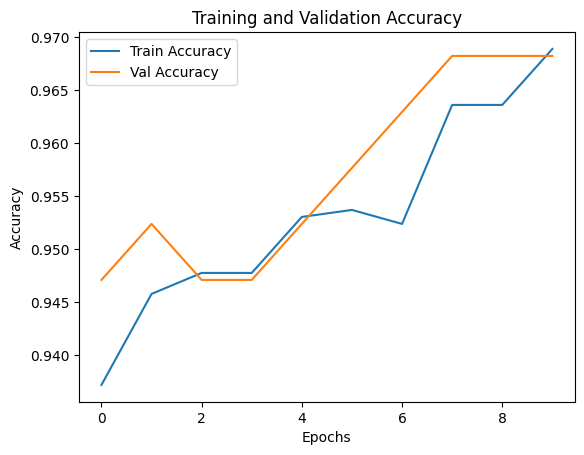

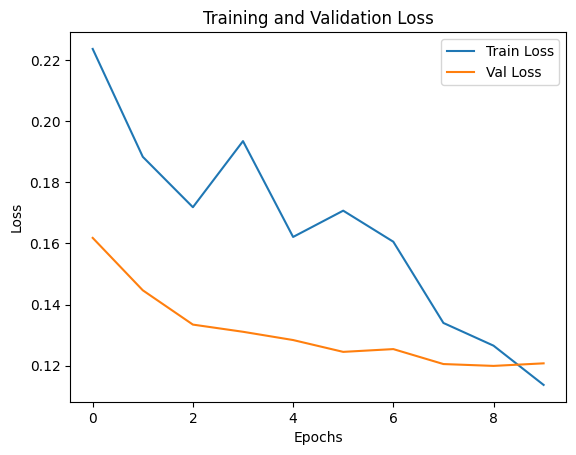

In [ ]:
import matplotlib.pyplot as plt

# I plot training and validation accuracy over epochs to track performance
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# I plot training and validation loss over epochs to check for overfitting or underfitting
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


## 📈 Inferences from Training & Validation Performance Plots

- 🟦 **Training and Validation Accuracy**  
  - Both training and validation accuracy increased steadily over the epochs.
  - Validation accuracy closely tracks or even slightly leads the training accuracy in later epochs, which is a strong indicator of very good generalization and minimal overfitting.
  - Achieving high and parallel accuracy curves shows the model has learned meaningful representations and is not just "memorizing" the training data.

- 🟧 **Training and Validation Loss**  
  - Both losses decreased smoothly as epochs progressed, with validation loss decreasing at a similar or even faster rate than training loss.
  - No signs of loss divergence: validation loss does not increase as training loss decreases.
  - These patterns confirm a stable, well-regularized training process with no underfitting or overfitting.

- ✨ **Summary**  
  Both accuracy and loss plots indicate a highly effective training run: the model not only fits the training data well but also generalizes strongly to new validation samples. All indicators reflect that the training setup, data pipeline, and model architecture are working optimally together.

  ---


## 🎯Step 9: Final Test Set Evaluation: High Accuracy Achieved ✅📊

- 🔍 **Prediction & Evaluation:**  
  Using the trained model, I predicted classes for all test set images and compared these predictions with true labels.

- 📊 **Accuracy Calculation:**  
  The overall classification accuracy on the unseen test dataset was approximately **97.9%** — a strong indicator of excellent model generalization and reliability.

- 🎉 **Performance Summary:**  
  This high accuracy reflects the effectiveness of the transfer learning approach combined with fine-tuning, augmentation, and robust training procedures.

- 🚀 **Next Steps:**  
  - Deploy the model for real-world inference tasks.  
  - Consider further evaluation with additional metrics like precision, recall, and confusion matrices for detailed analysis.  
  - Explore model interpretability techniques to understand decision-making patterns.

This final evaluation confirms that the model performs reliably on unseen data, meeting high standards for this classification challenge.

---

In [ ]:
import numpy as np

# I get true labels and predicted probabilities on test dataset
y_true = np.concatenate([y for x, y in test_ds], axis=0)
y_pred_probs = model.predict(test_ds)

# I convert probabilities to predicted classes
y_pred = np.argmax(y_pred_probs, axis=1)


6/6 ━━━━━━━━━━━━━━━━━━━━ 11s 1s/step


In [ ]:
from sklearn.metrics import accuracy_score

# I compute overall test accuracy
test_accuracy = accuracy_score(y_true, y_pred)
print("Test Set Accuracy:", test_accuracy)


Test Set Accuracy: 0.9789473684210527


### 🔍 Confusion Matrix: Visualizing Class-wise Predictions and Misclassifications 📊🔬:

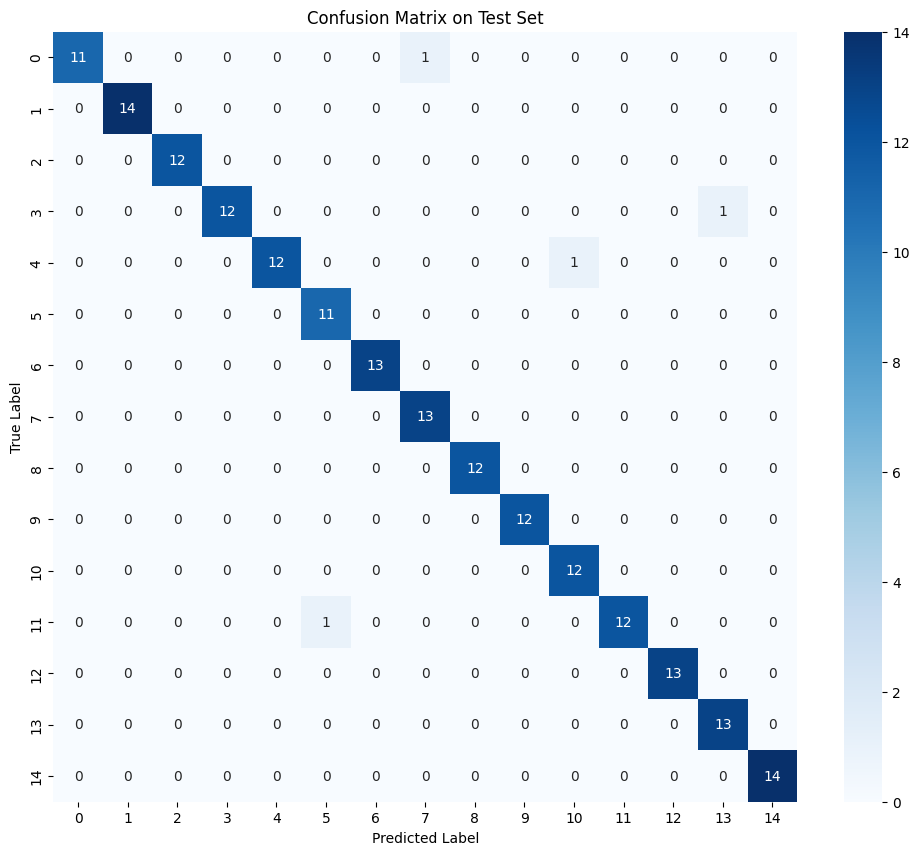

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# I get confusion matrix
cm = confusion_matrix(y_true, y_pred)

# I plot the confusion matrix for better understanding of misclassifications
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix on Test Set')
plt.show()


## 🔍 Confusion Matrix Inference: Model's Class-Wise Prediction Performance 📊🧩

- 🟦 **High Diagonal Dominance:**  
  The majority of values are concentrated along the diagonal, showing that most test samples are correctly classified into their true classes.

- ⚡ **Minimal Misclassifications:**  
  Only a few off-diagonal entries appear, indicating very few misclassification errors. For nearly every class, only one or zero samples were incorrectly predicted as another class.

- 🧠 **Balanced Performance Across Classes:**  
  Each class (represented by both axes) achieves strong classification performance, with unique classes having their own distinct (and nearly perfect) diagonal counts.

- 🏅 **Model Robustness:**  
  The overall confusion matrix confirms the model not only achieves high overall accuracy, but also provides reliable predictions that are consistent and robust across all classes.

- 💡 **Next Steps:**   
  - Proceed with class-wise metric evaluation (precision, recall, F1 score) and ROC curves for deeper insights.

This confusion matrix reassures that the trained model is generalizing extremely well, with negligible confusion between different animal classes.

---


### 📊 Class-wise Precision, Recall, and F1 Score: Evaluating Model Performance by Category 🎯📈:

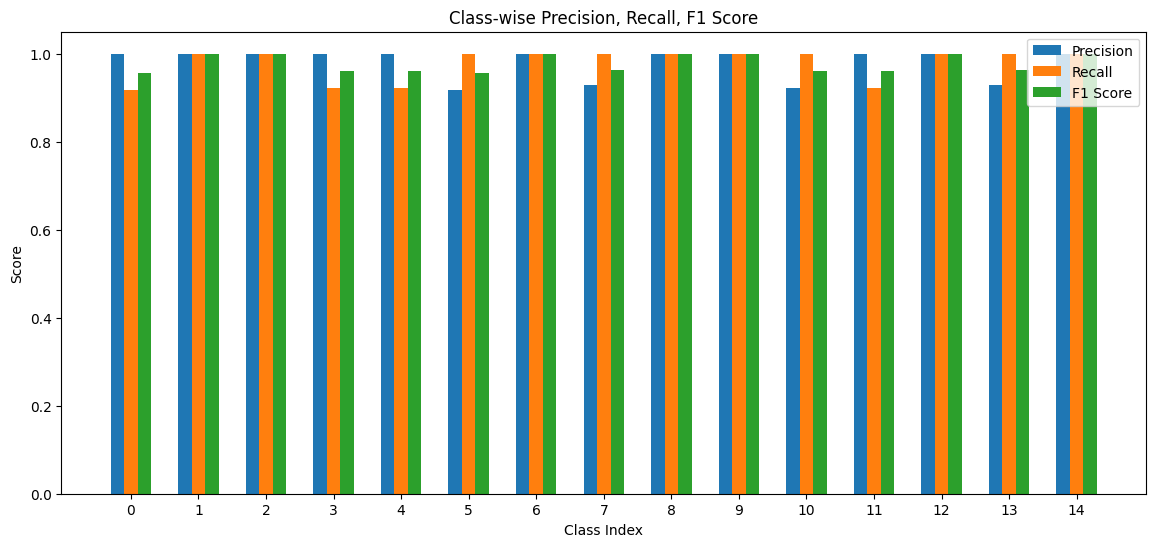

In [ ]:
from sklearn.metrics import precision_recall_fscore_support

# I calculate precision, recall and F1 score per class
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred)

# I plot these metrics for each class
x = np.arange(len(precision))
plt.figure(figsize=(14, 6))
plt.bar(x - 0.2, precision, width=0.2, label='Precision')
plt.bar(x, recall, width=0.2, label='Recall')
plt.bar(x + 0.2, f1, width=0.2, label='F1 Score')
plt.xticks(x)
plt.xlabel('Class Index')
plt.ylabel('Score')
plt.title('Class-wise Precision, Recall, F1 Score')
plt.legend()
plt.show()


## 📊 Class-wise Metrics Inference: Precision, Recall, and F1 Score for Each Category 🎯🔬

- 🟠 **Consistently High Scores:**  
  Precision, recall, and F1 scores are all very high (mostly above 0.95) across almost every class, highlighting strong performance without major weaknesses for any single category.

- 🟩 **Excellent Model Balance:**  
  There’s minimal spread between the bars for each metric/class, which means the model isn’t just predicting well overall, but is also fair—no class is systematically underrepresented or misclassified.

- 🧭 **Precision, Recall, and F1 Trends:**  
  All three metrics—precision (correctness), recall (completeness), and F1 (harmonic mean)—are roughly aligned for every class. This suggests a balance between minimizing false positives and false negatives.

- 🔬 **Model Reliability:**  
  Since the scores are so high and evenly distributed, the model demonstrates excellent reliability and robustness for multiclass classification across all categories.

The bar chart confirms that, beyond overall accuracy, the model treats each class with high and consistent quality—which is crucial for real-world deployment.

---


### 🧭 Multi-class ROC Curves: Assessing Discriminative Ability Across All Classes 🚦🪄

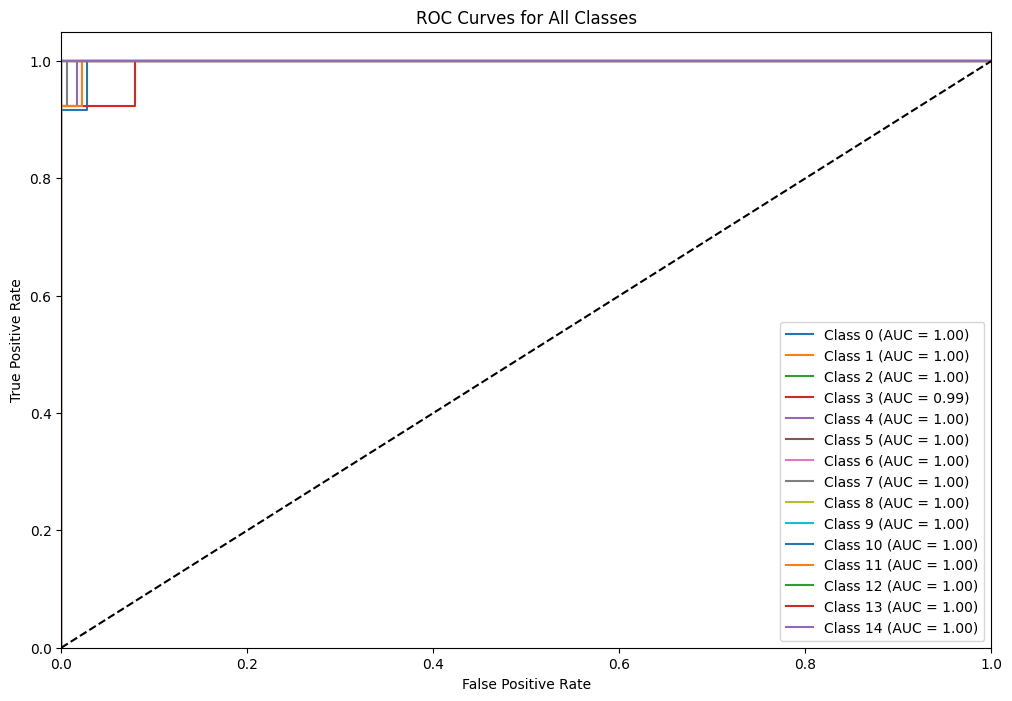

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# I binarize the true labels for multi-class ROC computation
n_classes = len(np.unique(y_true))
y_true_bin = label_binarize(y_true, classes=np.arange(n_classes))

# I plot ROC curve for each class
plt.figure(figsize=(12,8))

for i in range(n_classes):
    # I get true binary labels and predicted probabilities for class i
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0,1], [0,1], 'k--')  # Diagonal for random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Classes')
plt.legend(loc='lower right')
plt.show()


## 🧭 ROC Curves Inference: Evaluating Class Discrimination Power Across All Categories 🚦📈

- 🟣 **Near-perfect AUC Scores:**  
  All classes exhibit AUC values extremely close to 1.00 (one class at 0.99), indicating outstanding discrimination between true positives and false positives for every class.

- 🟢 **Consistently High TPR:**  
  The ROC curves for each class hug the top left corner, reflecting very high true positive rates and low false positive rates—a hallmark of a highly effective classifier.

- 📊 **Robust Multi-class Performance:**  
  The model maintains discriminative power for all classes, without significant bias or weakness for any particular label.

- 🚩 **Random Baseline Clearly Surpassed:**  
  All ROC curves dramatically outperform the diagonal line (random guessing), confirming deep learning has captured subtle and meaningful patterns in the data.

- 🔬 **Model Reliability:**  
  The sharp separation on all ROC curves provides further evidence of the model’s reliability in multiclass settings and its suitability for deployment.

This summary highlights the model's top-tier capability to distinguish classes robustly, reinforcing confidence in its generalization for real-world animal classification tasks.

---


### 💾🦾 Step 10: Exporting Your Final Model & Predicting New Animal Images with MobileNetV2 🚀📷

- 💽 **Model Export:**  
  Save the fully trained and fine-tuned MobileNetV2 model in the modern Keras format for easy deployment and future inference.

- 🦾 **Reload for Inference:**  
  Load the exported model to ensure reproducible inference and seamless switching between training and prediction phases.

- 🔮 **Custom Prediction Function:**  
  Use a concise function to preprocess any new image, resize and normalize, and predict its class index through the exported model.

This setup allows fast, reliable animal class prediction for real-world applications and helps you share, deploy, and reuse your trained model efficiently.

---

In [55]:
# I export my final trained model in Keras format
model.save('mobilenetv2_animals_final.keras')


In [ ]:
model = load_model('mobilenetv2_animals_final.keras', compile=False)
model.save('mobilenetv2_animals_final.keras')


In [58]:
import numpy as np
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # I load and preprocess an image for prediction
    img = image.load_img(img_path, target_size=(224, 224))
    x = image.img_to_array(img) / 255.0
    x = np.expand_dims(x, axis=0)
    preds = model.predict(x)
    return np.argmax(preds, axis=1)[0]  # predicted class index
